In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
# Importing the necessary libraries
from utilities.configs import ConFiGS
from render.scene_render import SceneRender
from controller.vehicle_rate_mpc import VehicleRateMPC
from controller.open_loop import OpenLoop
import visualize.plot_trajectories as pt
import dynamics.flying as fly

import numpy as np

In [3]:
# Load and List Configs
config = ConFiGS()
gsplat = SceneRender(config)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
/home/admin/StanfordMSL/SFTI-Program/nerf_data/outputs/backroom/splatfacto/2024-11-13_204632/nerfstudio_models/step-0000
29999.ckpt

In [ ]:
# Modify config
config.add_config("mpc_parameters","flightroom")
config.add_config("flying_parameters","alpha")
config.add_config("fout_waypoints","track_hover")
# config.add_config("fout_waypoints","track_line")
# config.add_config("fout_waypoints","track_cluttered")

# Load the MPC Controller
flying = fly.Flying(config)
policy = VehicleRateMPC(config)

In [ ]:
# Load the MPC Controller
config = ConFiGS(
    mpc_config="flightroom",
    drone_config="fat_carl"
    flying_config="alpha",
    fout_config="track_cluttered"
)
policy = VehicleRateMPC(config)
flying = fly.Flying(config)

# Simulate the system
t0 = policy.tXUd[0,0]
tf = policy.tXUd[0,-1]
x0 = policy.tXUd[1:11,0]
Tro,Xro,Uro,Imgs,Tsol,_ = flying.simulate(policy,gsplat,t0,tf,x0)

(1, 440) (10, 440) (4, 440)


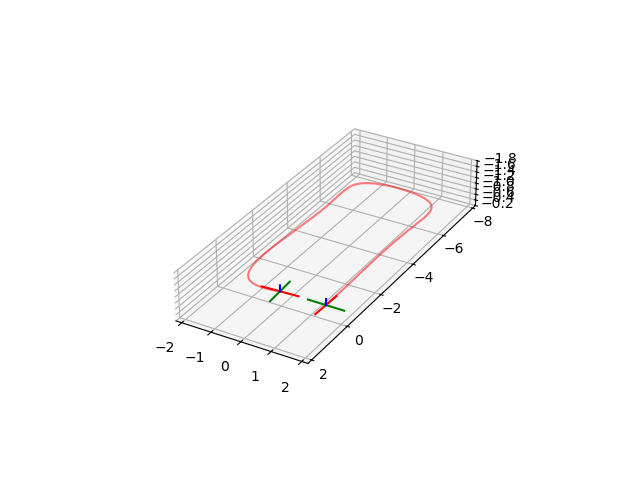

In [ ]:
# Plot the results
Ta = Tro[:-1].reshape(1,-1)
Xa = Xro[:,:-1]
Ua = Uro

tXUa = np.vstack((Ta,Xa,Uro))
pt.plot_tXU_time(tXUa)

# policy.clear_generated_code()
# flying.clear_generated_code()
# del policy, flying